<a href="https://colab.research.google.com/github/Abhinav2907/Machine-Learning-and-data-analysis-notebooks/blob/master/svd_svdpp_booksdataste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install surprise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from surprise import Reader, Dataset, SVD, SVDpp, evaluate
from sklearn.model_selection import cross_validate

    100% |████████████████████████████████| 3.3MB 8.7MB/s 
  Running setup.py bdist_wheel for scikit-surprise ... - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise


In [0]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [0]:
ratings.shape

(1149780, 3)

In [0]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


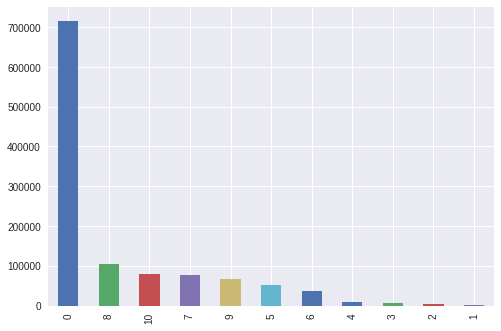

In [0]:
ratings.bookRating.value_counts().plot(kind = 'bar')

In [0]:
ratings1 = ratings.loc[ratings['bookRating'] != 0]

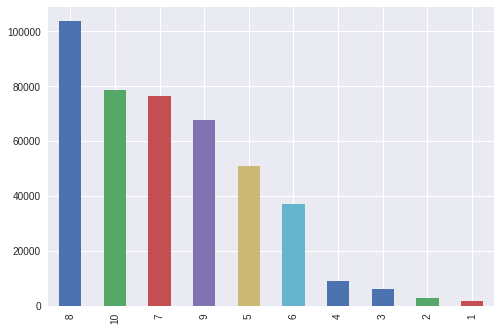

In [0]:
ratings1.bookRating.value_counts().plot(kind = 'bar')

In [0]:
reader = Reader(line_format='user item rating', sep='\t')
data = Dataset.load_from_df(ratings1, reader=reader)

In [0]:
data.split(n_folds=3)#cv in surprise

In [0]:
algo1 = SVD()
evaluate(algo1, data, measures=['RMSE', 'MAE'])

/usr/local/lib/python3.6/dist-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/usr/local/lib/python3.6/dist-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 3.1870
MAE:  2.7665
------------
Fold 2
RMSE: 3.1879
MAE:  2.7678
------------
Fold 3
RMSE: 3.1899
MAE:  2.7712
------------
------------
Mean RMSE: 3.1883
Mean MAE : 2.7685
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [2.766526852911144,
                             2.767834212712486,
                             2.7711766391830377],
                            'rmse': [3.1869593664777796,
                             3.1879419572862875,
                             3.189881900439998]})

In [0]:
trainset = data.build_full_trainset()
algo1.fit(trainset)

In [0]:
userid = str(276726)
itemid = '0155061224'
actual_rating = 5
print(algo1.predict(userid, itemid, actual_rating))

user: 276726     item: 0155061224 r_ui = 5.00   est = 5.00   {'was_impossible': False}


In [0]:
algo2 = SVDpp()
evaluate(algo2, data, measures=['RMSE', 'MAE'])

/usr/local/lib/python3.6/dist-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/usr/local/lib/python3.6/dist-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVDpp.

------------
Fold 1
RMSE: 3.1876
MAE:  2.7673
------------
Fold 2
RMSE: 3.1886
MAE:  2.7687
------------
Fold 3
RMSE: 3.1906
MAE:  2.7722
------------
------------
Mean RMSE: 3.1889
Mean MAE : 2.7694
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [2.767313229170624,
                             2.7686532642867356,
                             2.7721500810973825],
                            'rmse': [3.1876384267101643,
                             3.1885593069894576,
                             3.190572681119268]})

it takes a long time to run svdpp. It is better than svd but requires a long time of computation,

In [0]:
trainset = data.build_full_trainset()
algo2.fit(trainset)

In [0]:
userid = str(276726)
itemid = '0155061224'
actual_rating = 5
print(algo2.predict(userid, itemid, actual_rating))

user: 276726     item: 0155061224 r_ui = 5.00   est = 5.00   {'was_impossible': False}
